**Arndt Final Project Notebook**

First, let's import pandas and our data file. The data file, "Playground-Equipment.csv", tells us about every piece of (recorded) playground equipment in Pittsburgh.

In [1]:
# load pandas
import pandas as pd
import numpy as np

# load data
playground_equipment = pd.read_csv("Playground-Equipment.csv")

Let's take a look at the first 10 rows of the data.

In [2]:
playground_equipment.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


How many pieces of playground equipment are in each neighborhood? We can use .value_counts() for that!

In [3]:
playground_equipment["neighborhood"].value_counts()

Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
East Carnegie           2
Central Oakland         2
Lower Lawrenceville     2
West Oakland            1
Strip District          1
Name: neighborhood, Length: 68, dtype: int64

Using the pure number of pieces of playground equipment as our metric, Squirrel Hill South is the best neighborhood. But what about other metrics, like disability accessibility and actual quality of equipment? Let's count the number of disability-accessible pieces of playground equipment in each neighborhood.

In [4]:
query_mask = playground_equipment["ada_accessible"] == "t"
disability_equipment = playground_equipment[query_mask]
disability_equipment["neighborhood"].value_counts()

Squirrel Hill South         7
Elliott                     4
East Liberty                4
South Side Slopes           4
Beechview                   4
Highland Park               3
Mount Washington            3
Sheraden                    3
Greenfield                  2
Morningside                 2
South Oakland               2
South Side Flats            2
Manchester                  2
Crawford-Roberts            2
Fineview                    2
Beltzhoover                 2
Hazelwood                   2
Lincoln-Lemington-Belmar    2
Bloomfield                  2
Carrick                     2
Brighton Heights            2
New Homestead               1
Upper Lawrenceville         1
Squirrel Hill North         1
Swisshelm Park              1
Bedford Dwellings           1
West End                    1
Perry North                 1
Troy Hill                   1
Central Lawrenceville       1
Upper Hill                  1
Stanton Heights             1
Homewood North              1
Lower Lawr

Once again, Squirrel Hill South comes out on top. The only ranking change among the top 5 is Allegheny Center, which drops way down, and Elliott, which ties East Liberty, Beechview, and South Side Slopes with 4 pieces of disability-accessible playground equipment.

Lastly, let's weight each piece of playground equipment based on its quality. To judge quality, we will use the "manufacturer" column. I have ranked the manufacturers based on a quick Google image search of some of their equipment. This ranking is somewhat arbitrary, but I did my best to give a detailed and thorough analysis of each.

First, let's print out all the unique types of manufacturers.

In [5]:
playground_equipment["manufacturer"].unique()

array(['Little Tykes', 'Playworld', nan, 'Gametime', 'Miracle',
       'Park Structures', 'Landscape Structures', 'Iron Mountain Forge',
       'Burke', 'Big Toys', 'Kompan'], dtype=object)

Here are my totally not arbitrary rankings:
1. Kompan (WTF is this an amusement park?) ![Kompan](https://dk22sb66g7qaa.cloudfront.net/aesir-dam-viewports/castle-and-nature-playground-made-from-robinia-1366.jpeg?rel=2020-12-15+10%3A49%3A27)
2. Burke (big and well-developed) ![Burke](https://www.bciburke.com/Portals/0/adam/Products%20Slider/NrWfuy30tkiBvIXviywlwQ/Image/field-of-dreams.jpg)
3. Landscape Structures (futuristic, would definitely play on it) ![Landscape](https://www.rossrec.com/wp-content/uploads/bfi_thumb/Hedra-playsystem-1-ojo8m76h9u248v59brz47n5r3kub5gv3acjmf2z6co.jpg)
4. Playworld (big slide) ![Playworld](https://playworld.com/sites/default/files/refresh-intro-image.jpg)
5. Little Tykes (car is cheap, fuel-efficient, and environmentally friendly) ![Little Tykes](https://m.media-amazon.com/images/I/71VEtPLgBxL._AC_SL1500_.jpg)
6. Park Structures (bland color scheme, but cool slide) ![Park Structures](https://www.miracle-recreation.com/content/uploads/2018/09/MREC_2018_OH_Westfork-Park_Structure-301.jpg)
7. Miracle (fairly standard, nothing exceptional) ![Miracle](https://hasley-recreation.com/wp-content/uploads/Destination-Park-Loganville-Georgia-Playground-Miracle-1024x682.jpg)
8. Gametime (terrible color scheme, but cool slide) ![Gametime](https://www.gametime.com/images/sized/GameTime-Playground-Tower-Rendering-18861-1621263048-3ecff71e66a3f640cb051d8d5d39bc69.jpg)
9. Iron Mountain Forge (lame) ![Iron Mountain Forge](https://ww1.prweb.com/prfiles/2011/04/21/8334129/green.jpg)
10. Big Toys (lame and too much exercise) ![Big Toys](https://www.bigtoys.com/images/homepage/category-traditionalstructures-img1.jpg)

I've created a point system based upon the rankings of the slides. Rank k gets 11 - k points. For example, Rank 1 gets 10 points, Rank 5 gets 6 points, and Rank 10 gets 1 point. With this points system in mind, I've calculated the total number of points for each neighborhood in the code block below.

In [6]:
equipment_types = ["Kompan", "Burke", "Landscape Structures", "Playworld", "Little Tykes", "Park Structures", "Miracle", "Gametime", "Iron Mountain Forge", "Big Toys"]

points = {}
for i in range(10):
    type = equipment_types[i];
    query_mask = playground_equipment["manufacturer"] == type
    equipment_of_type = playground_equipment[query_mask];
    seen_nbhds = {}
    for nbhd in equipment_of_type["neighborhood"]:
        if nbhd in seen_nbhds:
            continue
        seen_nbhds[nbhd] = 1;
        num_of_type = equipment_of_type["neighborhood"].value_counts().get(nbhd)
        if not num_of_type:
            continue
        addition = (10 - i) * num_of_type
        if nbhd in points:
            points[nbhd] += addition
        else:
            points[nbhd] = addition
ser = pd.Series(points)
ser = ser.sort_values(ascending=False)
print(ser)

East Liberty           232
Squirrel Hill South    141
Beechview              135
Allegheny Center        91
Hazelwood               83
                      ... 
Allentown               12
East Allegheny           7
West Oakland             7
Strip District           6
Hays                     4
Length: 68, dtype: int64


This data makes sense, as the rankings are largely the same. However, East Liberty is the sole owner of Kompan equipment, which is marked as the highest rated at 10 points each. This explains why East Liberty wins with a large margin on this sub-metric.

In [7]:
query_mask = playground_equipment["manufacturer"] == "Kompan"
kompan_equipment = playground_equipment[query_mask]
kompan_equipment["neighborhood"].value_counts()

East Liberty    18
Name: neighborhood, dtype: int64

Now, let's combine all three sub-metrics: total count, disability accessibility, and the weighted point system. To do so, let's normalize each metric and sum them for each neighborhood.

In [8]:
totals = {}

total_pge = playground_equipment["neighborhood"].value_counts().sum()
total_de = disability_equipment["neighborhood"].value_counts().sum()
total_wps = ser.sum()
for nbhd in playground_equipment["neighborhood"]:
    if nbhd in totals:
        continue
    pge_count = playground_equipment["neighborhood"].value_counts().get(nbhd)
    de_count = disability_equipment["neighborhood"].value_counts().get(nbhd)
    wps_count = ser.get(nbhd)
    if not pge_count:
        pge_count = 0
    if not de_count:
        de_count = 0
    if not wps_count:
        wps_count = 0
    totals[nbhd] = pge_count / total_pge + de_count / total_de + wps_count / total_wps 
totals_series = pd.Series(totals)
totals_series = totals_series.sort_values(ascending=False)
print(totals_series)

Squirrel Hill South    0.199659
East Liberty           0.189489
Beechview              0.141060
South Side Slopes      0.105008
Elliott                0.096349
                         ...   
Esplen                 0.009862
East Allegheny         0.009426
Hays                   0.008275
West Oakland           0.004931
Strip District         0.004548
Length: 68, dtype: float64


As expected, Squirrel Hill South comes out on top with the most equipment in total, the most disability-accessible equipment, and the second-highest quality rating. East Liberty is a close second, but most of its boost came from the ranking system, which is kind of arbitrary. Let's make a bar chart of the top 5 neighborhoods judged by our final normalized, combined metric.

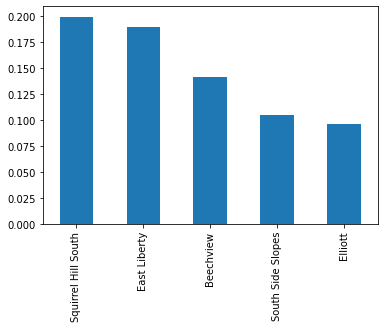

In [13]:
# Create a bar chart using the index as the category labels
pd.Series(totals_series.head(5)).plot.bar()

And, let's take a look at the top 10.

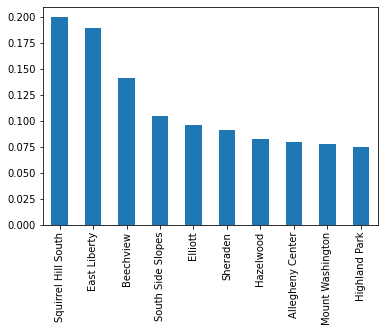

In [15]:
# Create a bar chart using the index as the category labels
pd.Series(totals_series.head(10)).plot.bar()

With all of this data in mind, **Squirrel Hill South** is the best neighborhood for playground equipment!